In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#read in data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

pd.options.display.max_columns=1000

heart_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

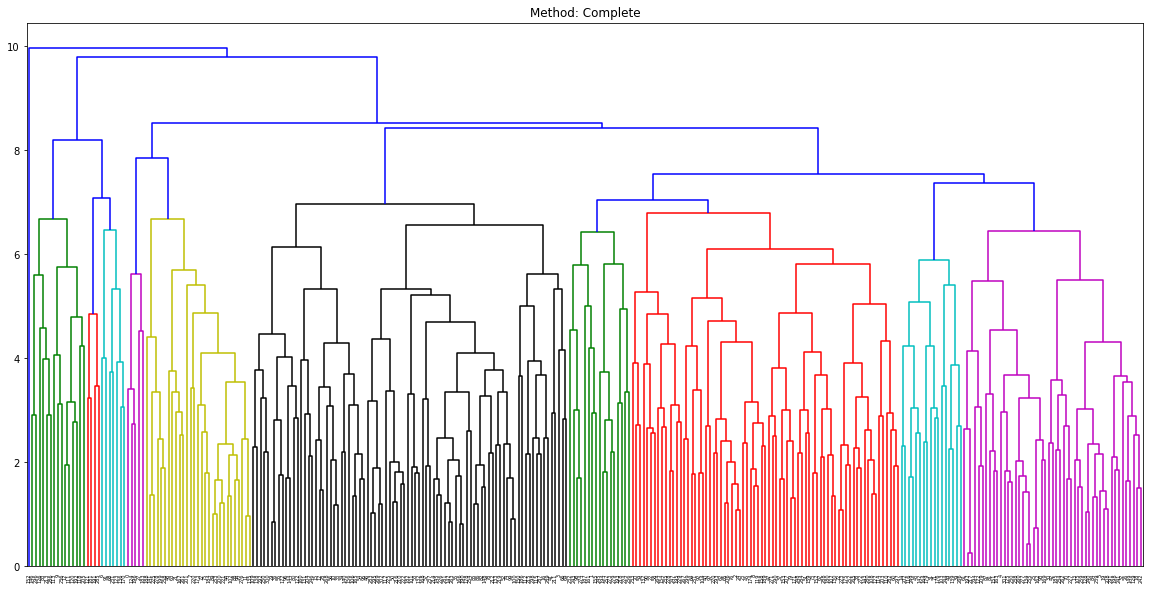

In [10]:
plt.figure(figsize=(20,10)) 

dendrogram(linkage(X_std, method='complete'))

plt.title('Method: Complete')

plt.show()

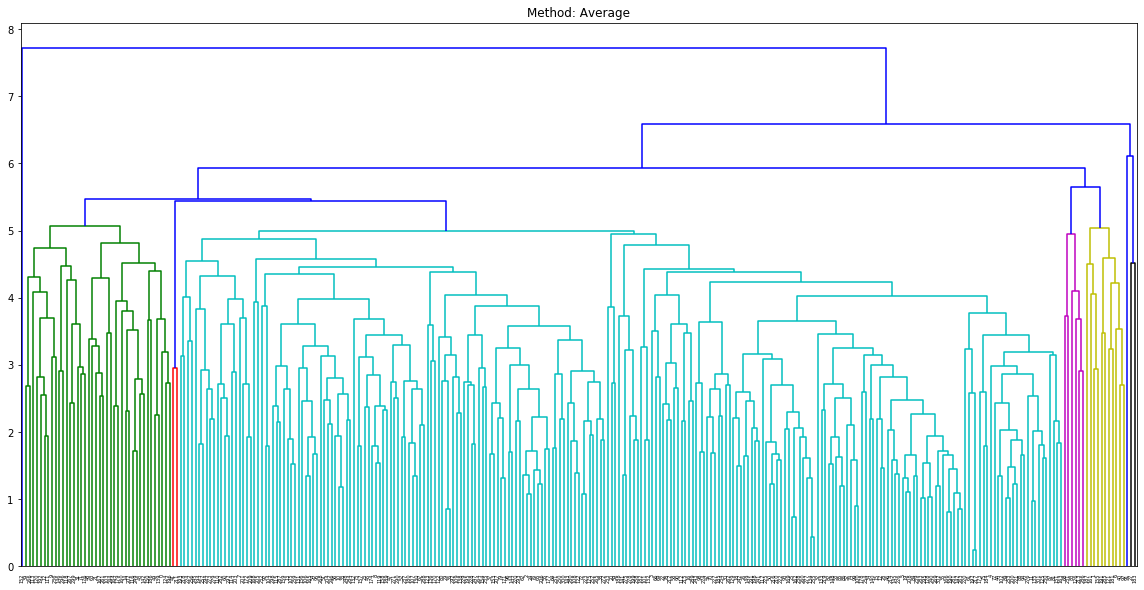

In [12]:
plt.figure(figsize=(20,10)) 

dendrogram(linkage(X_std, method='average'))

plt.title('Method: Average')

plt.show()

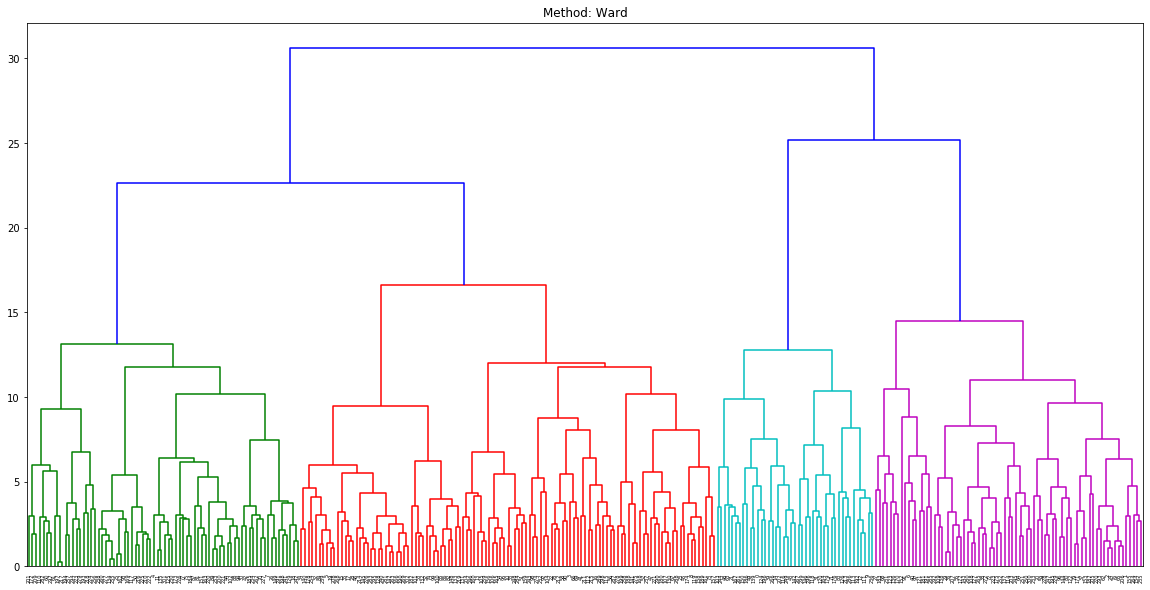

In [13]:
plt.figure(figsize=(20,10)) 

dendrogram(linkage(X_std, method='ward'))

plt.title('Method: Ward')

plt.show()

Ward produces most reasonable resutls among three methods. 

2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [43]:
#store results here
linkage = []
ARI = []
sihouette = []

In [44]:
agg = AgglomerativeClustering(linkage="average", 
                              affinity='cosine',
                              n_clusters=2)

y_pred = agg.fit_predict(X_std)

ari = metrics.adjusted_rand_score(y, y_pred)

sih = metrics.silhouette_score(X_std, y_pred, metric='euclidean')

linkage.append('average')
ARI.append(ari)
sihouette.append(sih)

##
agg = AgglomerativeClustering(linkage="complete", 
                              affinity='cosine',
                              n_clusters=2)

y_pred = agg.fit_predict(X_std)

ari = metrics.adjusted_rand_score(y, y_pred)

sih = metrics.silhouette_score(X_std, y_pred, metric='euclidean')

linkage.append('complete')
ARI.append(ari)
sihouette.append(sih)

##
agg = AgglomerativeClustering(linkage="ward", 
                              affinity='euclidean',
                              n_clusters=2)

y_pred = agg.fit_predict(X_std)

ari = metrics.adjusted_rand_score(y, y_pred)

sih = metrics.silhouette_score(X_std, y_pred, metric='euclidean')

linkage.append('ward')
ARI.append(ari)
sihouette.append(sih)

In [45]:
data = {'Linkage'  : linkage,
        'ARI'      : ARI,
        'Sihouette': sihouette 
}

result = pd.DataFrame(data=data)

result.sort_values(['ARI', 'Sihouette'], ascending=False)

,Linkage,ARI,Sihouette
0,average,0.294049,0.148374
1,complete,0.213940,0.117308
2,ward,0.146130,0.138720


Using linkage method average provides the best results. The ARI and sihouette scores of the 2-cluster k-means solution are 0.44 and 0.17, respectively. Therefore, k-means yields the best ARI score, however, agglomerative clustering yields the best Sihouette score. 